<center>

## **Car Price Predictor**

</center>




<p>A car price predictor is a model or system designed to estimate the price of a car based on various factors such as its make, model, year of manufacture, mileage, fuel type, and other relevant features. It's a type of regression model commonly used in the automotive industry to provide pricing guidance for both buyers and sellers.</p>

<img src="https://manisketcher.com/wp-content/uploads/2023/02/Scan4fev2023-scaled.jpg" width="800">


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="numpy.ufunc size changed")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

## Reading the Data

In [2]:
data = pd.read_csv('quikr_car.csv')

### Insights into the data

In [3]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
data.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


<p style="color: #0047ab;">
    <strong>Data Cleaning Needed:</strong><br>
    The 'year', 'Price', and 'kms_driven' columns should ideally be numeric types (integers or floats), but they are currently of type 'object'. These columns need to be converted to numeric types.<br>
    Missing values in the 'kms_driven' and 'fuel_type' columns need to be handled appropriately.
</p>


In [6]:
print("Shape of the DataFrame:")
print(data.shape)

print("\nSize of the DataFrame (total number of elements):")
print(data.size)

Shape of the DataFrame:
(892, 6)

Size of the DataFrame (total number of elements):
5352


In [7]:
data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# Data Cleaning

In [8]:
df = data.copy()

### Handling Year Column

In [9]:
data = data[data['year'].str.isnumeric()]

In [10]:
data['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: object

In [11]:
data['year'] = data['year'].astype(int)

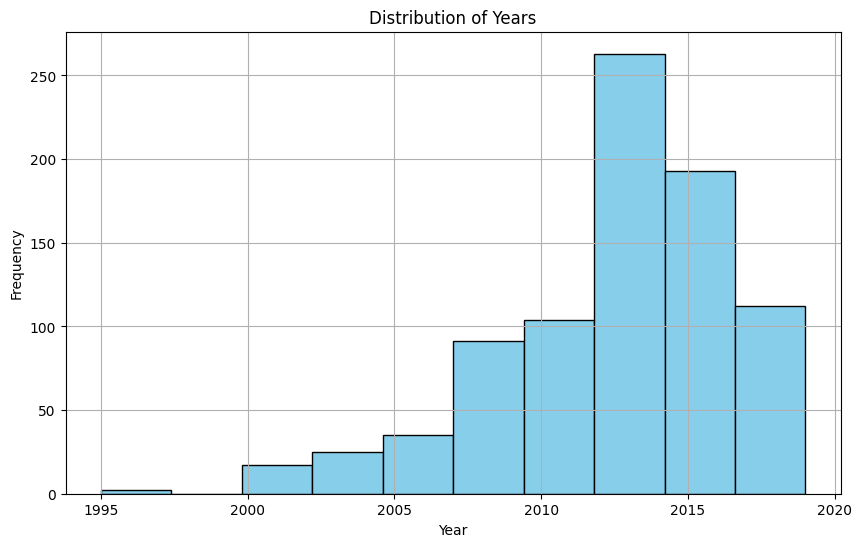

In [12]:
#Distribution of Year column 

plt.figure(figsize=(10, 6))
plt.hist(data['year'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Handling The Target Column

In [13]:
#Car price 
data = data[data['Price'] != 'Ask For Price']

In [14]:
data['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [15]:
data['Price'] = data['Price'].str.replace(',', '')

In [16]:
data['Price'] = data['Price'].astype(int)

### Handling Kilometer_Driven Column

In [17]:
data['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [18]:
data['kms_driven'] = data['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')

In [19]:
data = data[data['kms_driven'].str.isnumeric()]

In [20]:
data['kms_driven'] = data['kms_driven'].astype(int) 

### Handling Categorical Column

In [21]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [22]:
#mode imputations
data['fuel_type'].fillna(data['fuel_type'].mode()[0], inplace=True)

#### Checking for null values

In [23]:
data.isna().mean()*100

name          0.0
company       0.0
year          0.0
Price         0.0
kms_driven    0.0
fuel_type     0.0
dtype: float64

#### Checking for duplicate values

In [24]:
data.duplicated()

0      False
1      False
3      False
4      False
6      False
       ...  
883    False
885    False
886    False
888    False
889    False
Length: 817, dtype: bool

### Extracting the model name

In [25]:
data['name'] = data['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [26]:
data = data.reset_index(drop = True)

## EDA

### Checking for Outliers in Price Column

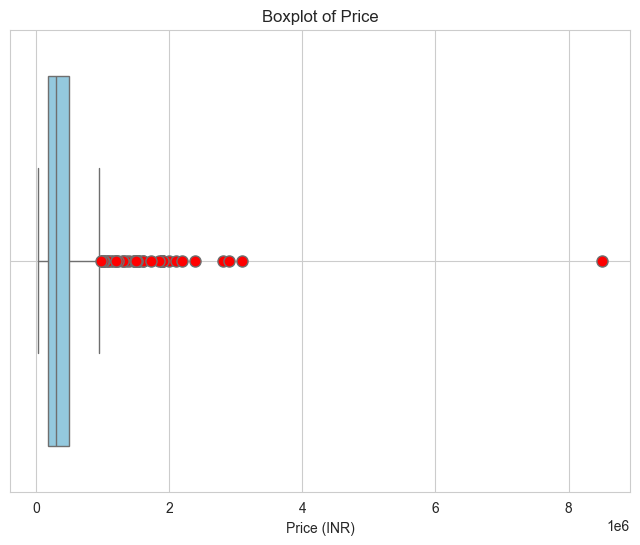

In [27]:
sb.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sb.boxplot(x=data['Price'], color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Boxplot of Price')
plt.xlabel('Price (INR)')
plt.grid(True)
plt.show()

### Handling the Outlier

In [28]:
lower_bound = data['Price'].quantile(0.05)  # 5th percentile
upper_bound = data['Price'].quantile(0.95)  # 95th percentile
data['Price'] = data['Price'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

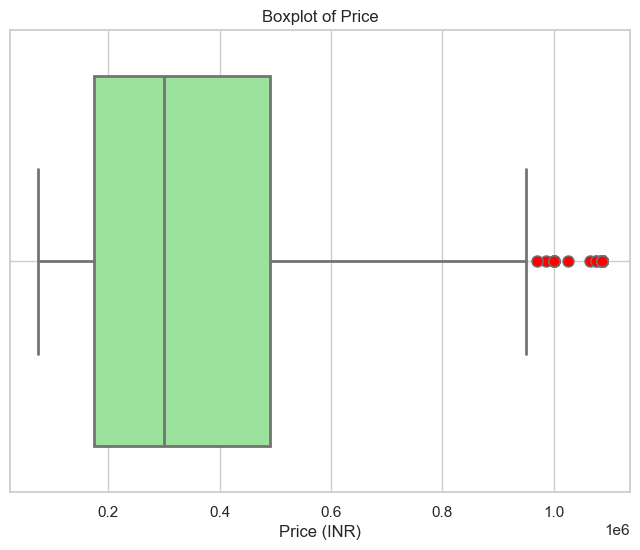

In [29]:
sb.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sb.boxplot(x=data['Price'], color='lightgreen', linewidth=2, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Boxplot of Price')
plt.xlabel('Price (INR)')
plt.grid(True)
plt.show()

### Checking for Outliers in Kilometer Column

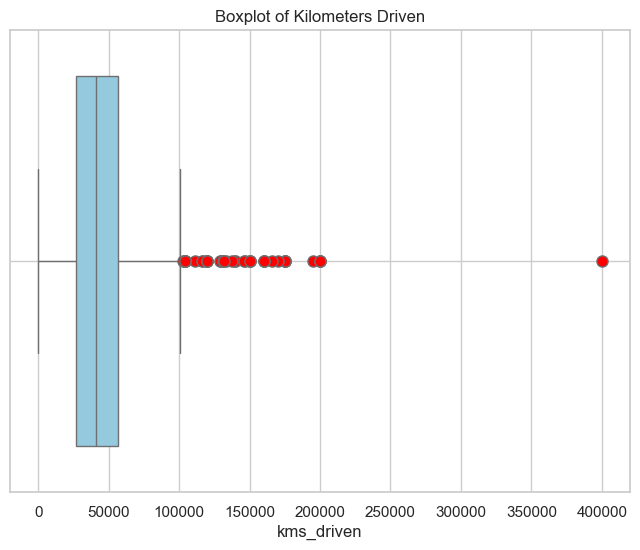

In [30]:
sb.set_style("whitegrid")

# Create a box plot for 'Price' column with custom colors
plt.figure(figsize=(8, 6))
sb.boxplot(x=data['kms_driven'], color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Boxplot of Kilometers Driven')
plt.grid(True)
plt.show()

### Handling the Outlier

In [31]:
lower_bound = data['kms_driven'].quantile(0.05)  # 5th percentile
upper_bound = data['kms_driven'].quantile(0.95)  # 95th percentile
data['kms_driven'] = data['kms_driven'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

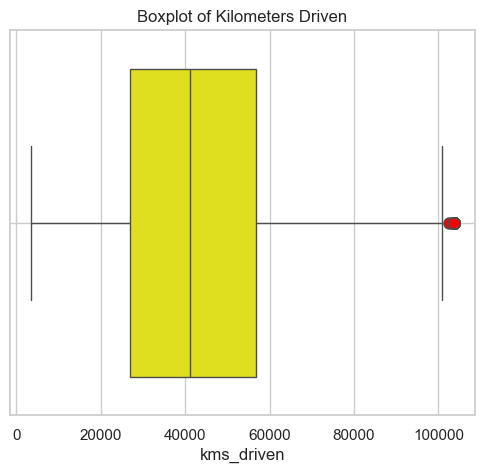

In [32]:
sb.set_style("whitegrid")
plt.figure(figsize=(6, 5))
sb.boxplot(x=data['kms_driven'], color='yellow', flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Boxplot of Kilometers Driven')
plt.grid(True)
plt.show()

### Plot for average Price by Company

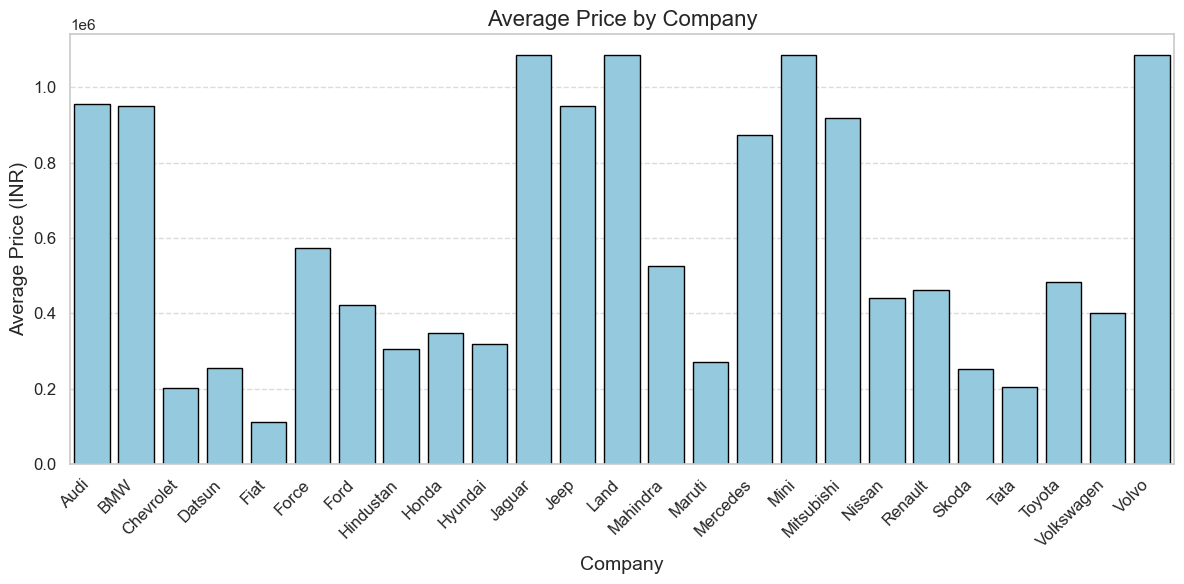

In [33]:
mean_prices = data.groupby('company')['Price'].mean().reset_index()
sb.set_style("whitegrid")
sb.set_palette("pastel")

plt.figure(figsize=(12, 6))
sb.barplot(x='company', y='Price', data=mean_prices, color='skyblue', edgecolor='black') 
plt.title('Average Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Average Price (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

## Inferences

<ul>
  <li>Luxury car brands such as Audi, BMW, Mercedes, Jaguar, Land Rover, and Volvo tend to have higher average prices compared to other brands.</li>
  <li>Economy and mid-range brands like Maruti, Tata, Chevrolet, Datsun, and Fiat have comparatively lower average prices.</li>
</ul>


### Kilometer Driven v/s Target Variable

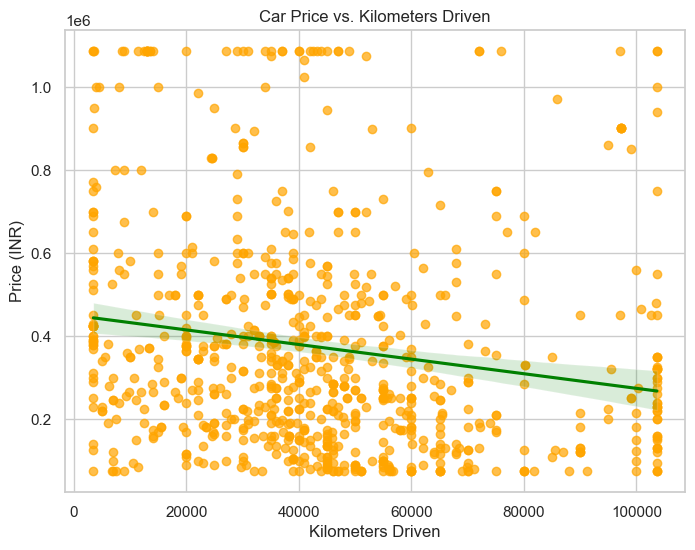

In [34]:
sb.set_style("whitegrid")
plt.figure(figsize=(8 ,6))
sb.regplot(x='kms_driven', y='Price', data=data, color='orange', line_kws={"color": "green"}, scatter_kws={'alpha':0.7, 'color': 'orange'})
plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

<b>Negative Correlation Between Car Price vs. Kilometers Driven as the regression line slopes downwards from left to right, it indicates a negative correlation: as one variable increases, the other tends to decrease.</b>

### Type of Fuel v/s Target Variable

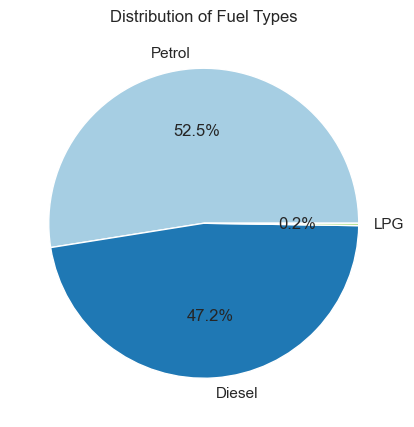

In [35]:
fuel_type_counts = data['fuel_type'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Fuel Types')
plt.show()

C:\Users\secur\AppData\Local\Temp\ipykernel_4056\4009011766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='fuel_type', y='Price', data=data, palette=custom_palette, inner='quartile', linewidth=2, alpha=0.7, saturation=0.8)
C:\Users\secur\AppData\Local\Temp\ipykernel_4056\4009011766.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sb.violinplot(x='fuel_type', y='Price', data=data, palette=custom_palette, inner='quartile', linewidth=2, alpha=0.7, saturation=0.8)


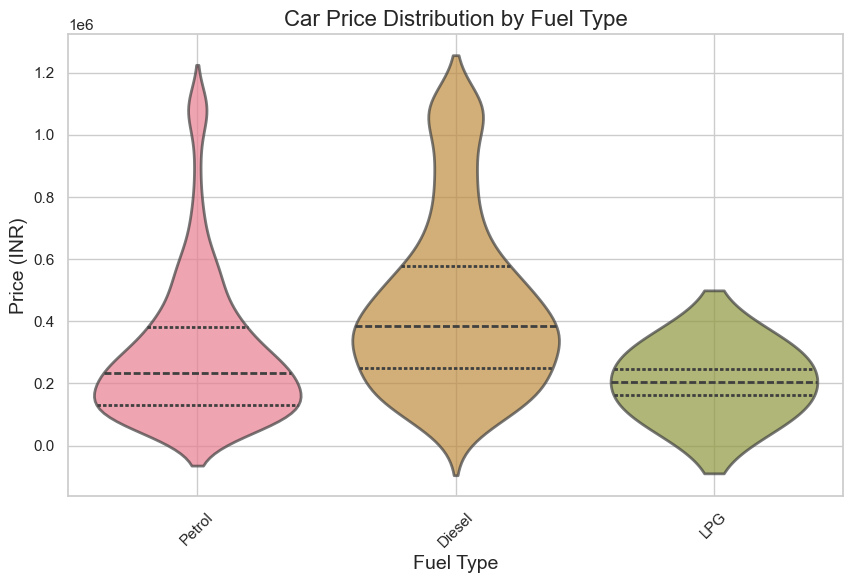

In [36]:
sb.set_style("whitegrid")
custom_palette = sb.color_palette("husl", 8)  # Using the 'husl' color palette with 8 colors
plt.figure(figsize=(10, 6))
sb.violinplot(x='fuel_type', y='Price', data=data, palette=custom_palette, inner='quartile', linewidth=2, alpha=0.7, saturation=0.8)
plt.title('Car Price Distribution by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Inferences

<ul>
  <li>Petrol and diesel are the most common fuel types.</li>
  <li>Petrol is slightly more prevalent than diesel.</li>
  <li>LPG (liquefied petroleum gas) is much less common, with only a few cars using it as fuel.</li>
</ul>


### Average car price by year

C:\Users\secur\AppData\Local\Temp\ipykernel_4056\1190911432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='year', y='Price', data=average_prices, palette='pastel', edgecolor='black')


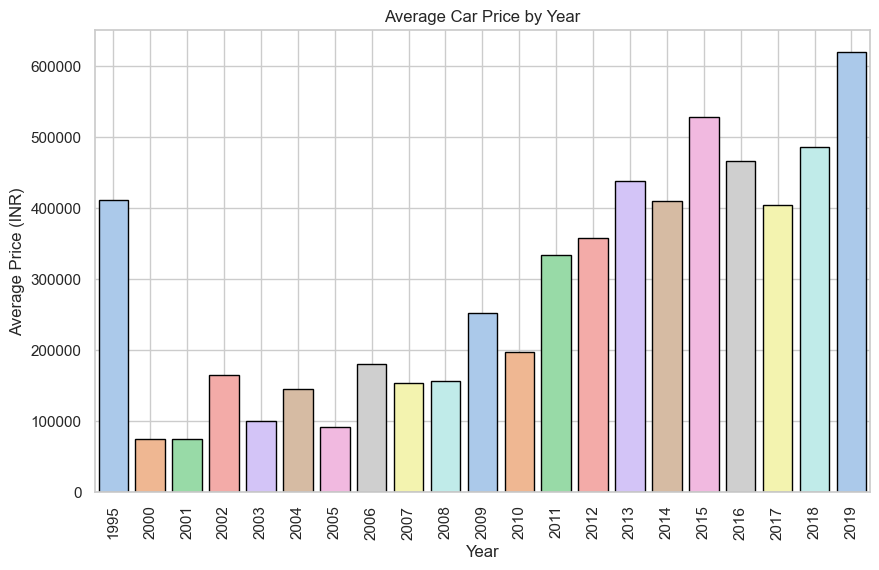

In [37]:
average_prices = data.groupby('year')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sb.barplot(x='year', y='Price', data=average_prices, palette='pastel', edgecolor='black')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Inferences

<ul>
  <li>There is a general increasing trend in average car prices over the years, with some fluctuations.</li>
  <li>Cars manufactured in the earlier years (e.g., 1995-2004) tend to have lower average prices compared to those manufactured in later years.</li>
  <li>There is a noticeable increase in average prices from around 2005 onwards.</li>
  <li>The years 2015 and 2019 stand out with relatively higher average car prices compared to other years.</li>
</ul>


In [38]:
data.to_csv('Cleaned Data.csv')

### Train-Test Splitting

### One-Hot Encoding The Categorical Columns

### Modeling

### Pipelining

In [56]:
# Load your data
data = pd.read_csv('Cleaned Data.csv')

# Define features and target
X = data.drop(columns='Price')
Y = data['Price']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type'])
    ])

# Create pipeline
lr = LinearRegression()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lr)])

# Scores list
scores = []

# Loop for multiple train-test splits
for i in range(2000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    scores.append(r2_score(Y_test, Y_pred))

# Re-split based on the highest score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.argmax(scores))
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

# Evaluate model
r2 = r2_score(Y_test, Y_pred)
print("R-squared score:", r2)

# Save the model
pickle.dump(pipe, open('LinearRegModel2.pkl', 'wb'))


R-squared score: 0.8218586789200554
